In [74]:
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras import utils
import pickle
from tqdm import tqdm
import cv2


In [75]:
DATADIR = "C:\\Users\\ra\\Desktop\\mini_project\\Database-2"  
img_shape=(120,120)
WIDTH=120
HEIGHT=120

In [76]:
CATEGORIES=["0" ,"1" ,"2" ,"3" ,"4" ,"5" ,"6" ,"7" ,"8" ,"9" ,"10" ,"11" ,"12" ,"13" ,"14" ,"15" ,"16" ,"17" ,"18" ,"19" ,"20" ,"21" ,"22" ,"23" ,"24" ,"25" ,"26" ,"27" ,"28" ,"29" ,"30" ,"31" ,"32" ,"33" ,"34" ,"35" ,"36" ,"37" ,"38" ,"39" ,"40" ,"41" ,"42" ,"43" ,"44" ,"45" ,"46" ,"47" ,"48" ,"49" ,"50" ,"51" ,"52" ,"53" ,"54" ,"55" ,"56" ,"57" ,"58" ,"59" ,"60" ,"61" ,"62" ,"63" ,"64" ,"65" ,"66" ,"67" ,"68" ,"69" ,"70" ,"71" ,"72" ,"73" ,"74" ,"75" ,"76" ,"77" ,"78" ,"79" ,"80" ,"81" ,"82" ,"83" ,"84" ,"85" ,"86" ,"87" ,"88" ,"89" ,"90" ,"91" ,"92" ,"93" ,"94" ,"95" ,"96" ,"97" ,"98" ,"99" ,"100" ,"101" ,"102" ,"103" ,"104" ,"105" ,"106" ,"107" ,"108" ,"109" ,"110" ,"111" ,"112" ,"113" ,"114" ,"115" ,"116" ,"117" ,"118" ,"119" ,"120" ,"121" ,"122" ,"123" ,"124" ,"125" ,"126" ,"127" ,"128" ,"129" ,"130" ,"131" ,"132" ,"133" ,"134" ,"135" ,"136" ,"137" ,"138" ,"139" ,"140" ,"141" ,"142" ,"143" ,"144" ,"145" ,"146" ,"147" ,"148" ,"149" ,"150"]
training_data=[]

In [77]:
  for category in CATEGORIES:      
    path = os.path.join(DATADIR,category)  
    class_ind = CATEGORIES.index(category)
    class_num = np.zeros(151)
    class_num = class_ind
    for img in tqdm(os.listdir(path)): 
      img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE) 
      
      
      img_array = cv2.resize(img_array,img_shape,interpolation = cv2.INTER_CUBIC)
      training_data.append([img_array, class_num])

100%|██████████| 50/50 [00:00<00:00, 159.33it/s]


In [78]:
import random

In [79]:
random.shuffle(training_data)

In [80]:
features_data = []
label_data = []

for features,label in training_data:
  features_data.append(features)
  label_data.append(label)

In [81]:
features_numpy=np.array(features_data)
label_data_numpy=np.array(label_data)
features_numpy=features_numpy.reshape(len(features_numpy),WIDTH,HEIGHT)

In [82]:
pickle_out = open("akashara_hand_char1_28 x 28.pickle","wb")
pickle.dump(features_numpy, pickle_out)
pickle_out.close()
pickle_out = open("akashara_hand_label1_28 x 28.pickle","wb")
pickle.dump(label_data_numpy, pickle_out)
pickle_out.close()

In [83]:
pickle_in = open("C:\\Users\\ra\\Desktop\\mini_project\\akashara_hand_char1_28 x 28.pickle","rb")
features_numpy1 = pickle.load(pickle_in)

pickle_in = open("C:\\Users\\ra\\Desktop\\mini_project\\akashara_hand_label1_28 x 28.pickle","rb")
label_numpy1 = pickle.load(pickle_in)

In [84]:
features_numpy1.shape

(7607, 120, 120)

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
X_train, X_test, Y_train, Y_test = train_test_split(
     features_numpy1, label_numpy1, test_size=0.1, random_state=42)

In [87]:
X_train=X_train/255.0
X_test=X_test/255.0
# print(Y_train.shape)
# print(Y_test.shape)

In [88]:
X_test.shape

(761, 120, 120)

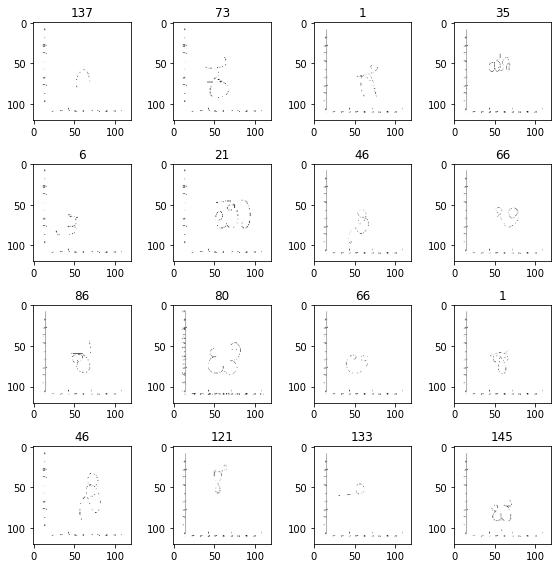

In [89]:
# Plot 4 columns and 4 rows for a subplot
plt_cols = 4
plt_rows = 4

# Start at image #100 of our train_x dataset
row_to_start = 100

# Create a figure, where each figure has a size (8,8)
fig=plt.figure(figsize=(8, 8))

# iterate between row_to_start to the amount of rows and cols we have created
for i in range(row_to_start, row_to_start + plt_cols*plt_rows):
    # each plot will initate the same rows and cols, for the 3rd param we will iterate from 1 to (rows * cols)
    fig.add_subplot(plt_rows, plt_cols, i - row_to_start + 1)
    fig.tight_layout()
    #image to show is the train_x
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    plt.title(label_numpy1[Y_train[i]])
plt.show()

In [90]:
Y_train = utils.to_categorical(Y_train, 151)
Y_test = utils.to_categorical(Y_test, 151)
print("train_y: ", Y_train.shape)
print("test_y: ", Y_test.shape)

train_y:  (6846, 151)
test_y:  (761, 151)


In [91]:
X_train = X_train.reshape(-1, HEIGHT, WIDTH, 1)
X_test = X_test.reshape(-1, HEIGHT, WIDTH, 1)

In [92]:
print(X_train.shape)
print(X_test.shape)

(6846, 120, 120, 1)
(761, 120, 120, 1)


In [93]:
#Model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import time

In [94]:
HEIGHT = 120
WIDTH = 120
class_num = 151

In [95]:
# partition to train and val
train_x, val_x, train_y, val_y = train_test_split(
    X_train, Y_train, test_size=0.10, random_state=7)

In [96]:
dense_layers = [2]
layer_sizes = [128]
conv_layers = [2]
callback = EarlyStopping(monitor='val_loss', patience=3)

In [97]:
for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = "Final:{}-conv-{}-nodes-{}-dense-0.2-Dropout-{}".format(
                conv_layer, layer_size, dense_layer, int(time.time()))
            
            # initialize TensorBoard in the loop
#             tensorboard = TensorBoard(log_dir='logs/{}'.format(NAME))
            print(NAME) # Final:2-conv-128-nodes-2-dense-0.2-Dropout

            # Build the model
            model = Sequential()

            # Begin with Conv2D layer
            model.add(Conv2D(layer_size, (3, 3), input_shape=(HEIGHT, WIDTH, 1)))
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=(2, 2)))

            for l in range(conv_layer - 1):
                # Extra Conv2D layers
                model.add(Conv2D(layer_size, (3, 3)))
                model.add(Activation('relu'))
                model.add(MaxPooling2D(pool_size=(2, 2)))

            model.add(Flatten())

            for l in range(dense_layer):
                # Adding dense layers
                model.add(Dense(layer_size))
                model.add(Activation('relu'))
                model.add(Dropout(0.2))

            # Output layer
            model.add(Dense(units=class_num, activation='softmax'))

            # Train the model
            model.compile(optimizer='adam',
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

            hist=model.fit(train_x, train_y, epochs=10, batch_size=32,callbacks=[callback],
                    validation_data=(val_x, val_y))

            model.save('models.h5')


Final:2-conv-128-nodes-2-dense-0.2-Dropout-1625069824
Epoch 1/10
193/193 [==============================] - 507s 3s/step - loss: 5.0357 - accuracy: 0.0089 - val_loss: 5.0194 - val_accuracy: 0.0161
Epoch 2/10
193/193 [==============================] - 497s 3s/step - loss: 5.0172 - accuracy: 0.0131 - val_loss: 5.0210 - val_accuracy: 0.0161
Epoch 3/10
193/193 [==============================] - 496s 3s/step - loss: 5.0164 - accuracy: 0.0131 - val_loss: 5.0226 - val_accuracy: 0.0161
Epoch 4/10
193/193 [==============================] - 496s 3s/step - loss: 5.0159 - accuracy: 0.0131 - val_loss: 5.0242 - val_accuracy: 0.0161


In [98]:
results = model.evaluate(X_test, Y_test, batch_size=128)
print("test loss, test acc:", results)


6/6 [==============================] - 14s 2s/step - loss: 5.0243 - accuracy: 0.0105
test loss, test acc: [5.024256706237793, 0.010512483306229115]
